# Homework 4 - CSCI 7000
## Behzod Mirpochoev

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Problem 1, data -> weekly incidence, new infections
that is not I(t), ~2 week duration

10% ascertainment, the proportion of actual cases that we can pick up
measuring 1/10 cases, actual cases are 10x what they should be

### Problem 3

In [2]:
pos = pd.read_csv("HW4_Q3_pos.csv")
neg = pd.read_csv("HW4_Q3_neg.csv")
data = pd.read_csv("HW4_Q3_data.csv")

neg.columns = ['values'] 
pos.columns = ['values']
data.columns = ['values'] 

neg['group'] = 'Negative Controls' 
pos['group'] = 'Positive Controls' 
data['group'] = 'Prevalence Study' 

all_data = pd.concat([neg, pos, data])

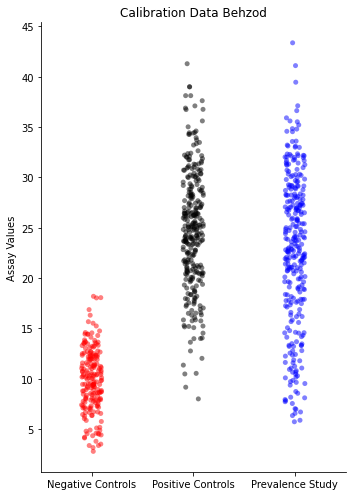

In [3]:
plt.figure(figsize=(5, 7))
palette_colors = {'Negative Controls': 'red', 'Positive Controls': 'black', 'Prevalence Study': 'blue'}

sns.stripplot(x='group', y='values', data = all_data, hue='group', palette=palette_colors, alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('')
plt.ylabel('Assay Values')
plt.legend().set_visible(False)
plt.title('Calibration Data Behzod')

plt.tight_layout()
plt.savefig('3a.jpg', dpi = 300)

In [4]:
def se(prev, c):
    above_cutoff = sum(1 for y in prev if y > c)
    return above_cutoff / len(prev)

def sp(prev, c):
    below_cutoff = sum(1 for z in prev if z < c)
    return below_cutoff / len(prev)

def phi_hat(empirical, c):
    above_cutoff = sum(1 for y in empirical if y > c)
    return above_cutoff / len(empirical)

def theta_hat(pos, neg, data, se, sp, phi_hat, c):
    numer = phi_hat(data, c) - (1 - sp(neg, c))
    denom = se(pos, c) + sp(neg, c) - 1
    return numer / denom

In [5]:
c_low = min(pos['values'])
c_high = max(neg['values'])

calibr = pd.concat([neg, pos])['values']
c_range = calibr[(calibr >= c_low) & (calibr <= c_high)]

J_opt, c_opt = max((se(pos['values'], c) + sp(neg['values'], c) - 1, c) for c in c_range)
print(f'Youden optimum = {J_opt}, c = {c_opt}')

Youden optimum = 0.9163207341053092, c = 15.082487812966695
